# Assignment 5 - Time Series Analysis
## Data Science Tools I
### Professor: Don Dalton

---

### Student: Duncan Ferguson

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Question 1 - Importing the Datasets

## Part (a)
### 8 points

Download the .csv files (CurrentPrices, EmploymentRate, ProductionVolume, and Sales) linked on Canvas on the assignment page and place them in a local repository alongside your notebook file. (If on Google Colab, upload the files to the colab.) Use Pandas to read each .csv file into its own variable.

After inspecting the first few rows of each data frame, clean up each data frame by converting the `Date` column to Datetime objects, then setting the index of the data frame to be the `Date` values to convert the data frame into a series.

Plot each dataset with an appropriate title, either individually in separate code cells or all together in a single plot using subplots.

In [26]:
CurrentPrices = pd.read_csv('CurrentPrices.csv') # Importing Current Prices
CurrentPrices['Date'] = pd.to_datetime(CurrentPrices['Date'])  # Casting Date as Datetime Object
CurrentPrices.sort_values(by=['Date'], inplace=True)  # Sorting the Values... Just in case
CurrentPrices.set_index('Date', inplace=True)
CurrentPrices

,Current_price
Date,
1997-01-01,149
1997-04-01,151
1997-07-01,154
1997-10-01,155
1998-01-01,157
...,...
2018-07-01,341
2018-10-01,343
2019-01-01,345


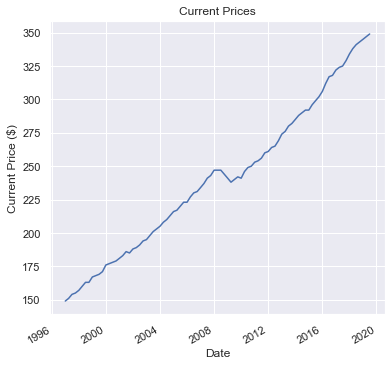

In [81]:
plt.figure(figsize=(6,6))
plt.plot(CurrentPrices)
plt.title("Current Prices")
plt.xlabel("Date")
plt.ylabel("Current Price ($)")
plt.gcf().autofmt_xdate()
plt.show()

In [29]:
EmploymentRate = pd.read_csv('EmploymentRate.csv')
EmploymentRate['Date'] = pd.to_datetime(EmploymentRate['Date'])
EmploymentRate.sort_values(by=['Date'], inplace=True)
EmploymentRate.set_index('Date', inplace=True)
EmploymentRate

,Empl_Rate
Date,
1971-02-01,72.2
1971-03-01,72.1
1971-04-01,72.0
1971-05-01,72.0
1971-06-01,71.9
...,...
2019-06-01,76.1
2019-07-01,75.9
2019-08-01,76.0


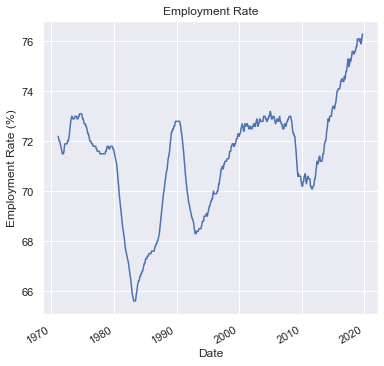

In [80]:
plt.figure(figsize=(6,6))
plt.plot(EmploymentRate)
plt.title("Employment Rate")
plt.xlabel("Date")
plt.ylabel("Employment Rate (%)")
plt.gcf().autofmt_xdate()
plt.show()

In [32]:
ProductionVolume = pd.read_csv('ProductionVolume.csv')
ProductionVolume['Date'] = pd.to_datetime(ProductionVolume['Date'])
ProductionVolume.sort_values(by=['Date'], inplace=True)
ProductionVolume.set_index('Date', inplace=True)
ProductionVolume

,IOP
Date,
1995-01-01,89.9
1995-02-01,93.3
1995-03-01,108.2
1995-04-01,91.0
1995-05-01,101.2
...,...
2019-08-01,95.9
2019-09-01,104.6
2019-10-01,108.7


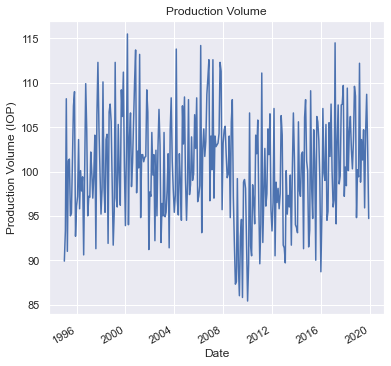

In [82]:
plt.figure(figsize=(6,6))
plt.plot(ProductionVolume)
plt.title("Production Volume")
plt.xlabel("Date")
plt.ylabel("Production Volume (IOP)")
plt.gcf().autofmt_xdate()
plt.show()

In [33]:
Sales = pd.read_csv('Sales.csv')
Sales['Date'] = pd.to_datetime(Sales['Date'])
Sales.sort_values(by=['Date'], inplace=True)
Sales.set_index('Date', inplace=True)
Sales

,Sales
Date,
2007-01-01,240
2007-02-01,235
2007-03-01,232
2007-04-01,178
2007-05-01,180
2007-06-01,140
2007-07-01,145
2007-08-01,152
2007-09-01,110


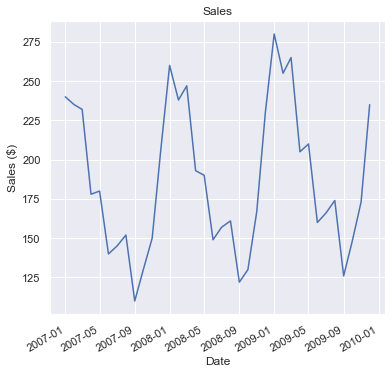

In [78]:
plt.figure(figsize=(6,6))
plt.plot(Sales)
plt.title("Sales")
plt.xlabel("Date")
plt.xticks()
plt.ylabel("Sales ($)")
plt.gcf().autofmt_xdate()
plt.show()

## Part (b)
### 4 points

Based on the plots you created in part (a), determine which pattern each dataset falls into and suggest a corresponding forecasting technique to match each pattern. For pattern and forecasting technique, limit your choice to the following options:

> **Patterns:** Horizontal, Trend, Seasonal without Trend, Seasonal with Trend

> **Forecasting Technique:** Naive Forecasting, Moving Average Smoothing, Exponential Smoothing, Regression Analysis, Regression Analysis with Dummy Variables

To answer this question, EDIT THIS TEXT CELL by replacing the x's below with your answers (as opposed to typing in a code cell).

Dataset | Pattern             | Forecasting Technique
--- |---------------------| ---
CurrentPrice | Trend               | x
EmploymentRate | Trend               | x
ProductionVolume | Horizontal          | x
Sales | Seasonal_with_Trend | x

##TODO

# Question 2 - Examining the Data

For this question and the subsequent ones, we will use the **ProductionVolume** dataset as the time series of interest.

## Part (a)
### 4 points

To start, check the stationarity of the data by plotting the rolling mean and standard deviation alongside the data itself. 

Based on your plot, is the data stationary? Provide reasons with your answes. Include your answer either as a text cell or in-line comment.

In [94]:
#ProductionVolume['rolling_avg'] = ProductionVolume.rolling(7).mean()
#plt.figure(figsize=(6,6))

#sns.lineplot(x='Date', y='IOP', data=ProductionVolume, label='IOP')
#sns.lineplot(x='Date', y='rolling_avg', data=ProductionVolume, label='Rolling Mean')
ProductionVolume


,IOP,rolling_avg
Date,,
1995-01-01,89.9,NaN
1995-02-01,93.3,NaN
1995-03-01,108.2,NaN
1995-04-01,91.0,NaN
1995-05-01,101.2,NaN
...,...,...
2019-08-01,95.9,102.271429
2019-09-01,104.6,103.014286
2019-10-01,108.7,102.514286


## Part (b)
### 4 points

Use `seasonal_decompose` to observe the trend, seasonality, and residuals for the data by plotting all plots alongside one another.

Based on your plots, is there a cyclical pattern in the data? Provide reasons with your answers. Include your answer either as a text cell or in-line comment.

## Part (c)
### 4 points

To further confirm stationarity or non-stationarity, perform the Dickey-Fuller Test on the data. You may use the `run_adftest` method provided in lecture.

Based on the result, is any differencing needed? If so, first-order difference the data and re-run the Dickey-Fuller Test to see if the results change.

# Question 3 - Model Estimation

## Part (a)
### 4 points

Plot the auto-correlation function (ACF) to get an indication of what type of ARIMA model may apply to this dataset. Refer to the table below to determine which model is best.

Provide your model choice either in a text cell below or as comments in the code cell alongside your code for the ACF plot. 

Shape | Indicated Model
--- | ---
Exponential, decay to zero | AR - Use PACF plot to identify order
Alternating positive and negative, decaying to zero | AR - Use PACF plot to identify order
One or more spikes, rest are essentially zero  | MA - Order identified by where plot becomes zero
Decay, starting after a few lags | ARMA
All zero or close to zero | Data is essentially random
High values at fixed intervals | Include seasonal autoregressive term / difference
No decay to zero | The series is not stationary

## Part (b)
### 5 points

Plot the partial auto-correlation function (PACF). Based on the PACF plot and ACF plot, determine what values are likely best for `p` and `q`. 

Question 2 Part (c) should have determined the best value for `d`. Fill in your answer for `p`, `d`, and `q` in this text cell:

`p=` YOUR_ANSWER_WITH_REASON

`d=` YOUR_ANSWER (reason provided in Question 2 Part (c))

`q=` YOUR_ANSWER_WITH_REASON

# Question 4 - Model Fitting



## Part (a)
### 6 points

Given your determination of `p`, `d`, and `q`, fit an ARIMA model with those parameters using the entire time series as training data. Get the predicted values from the model (calling `predict` with `d` as the start value and including `typ='levels'` if `d>0`) and compute the mean squared error (MSE) between the predictions and the actual values.

In addition to printing the resulting MSE, plot the predictions alongside the actual values.

## Part (b)
### 4 points

To further assess the accuracy of the model, plot the residual errors of the model both as a **histogram** and as a **scatterplot**.

Based on these plots, are the residuals normally distributed? Are the mean and variance constant over time? Provide reasons with your answers. Include your answer either as a text cell or in-line comment.

## Part (c)
### 2 points

Since the estimated parameters are not guaranteed to provide the best results, try fitting an ARIMA model with new parameters (different value for at least one of `p`, `d`, and `q`). Based on MSE, is your new model better or worse than your original in part (a)?

# Question 5 - Forecasting

For this question, use whichever model from question 4 ended up being the better one based on MSE.

## Part (a)
### 2 points

Use your model to forecast the next value and print the result.

## Part (b)
### 2 points

Use `plot_predict` to plot the actual data, the model's predictions for the actual data, and the confidence interval and forecasts for the next 50 steps.